In [2]:
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress

In [3]:
#CSV files
schooling_data_path = "data/mean-years-of-schooling.csv"
working_hours_data_path = "data/working_hours_KK.csv"
edu_level_data_path = "data/wrk_hrs_edu_new.csv"

# Read in the data
schooling = pd.read_csv(schooling_data_path)
working_hours = pd.read_csv(working_hours_data_path)
edu_level = pd.read_csv(edu_level_data_path)

#Combine the data into a single dataset
all_data = pd.merge(schooling, working_hours, how="left", on=["Year", "Year"])

#Drop years with no schooling data
all_data_new = all_data.dropna()
all_data_new.head(5)

,Entity_x,Code_x,Year,Total Years of Schooling,Entity_y,Code_y,Annual Working Hours
0,United States,USA,1870,3.70,United States,USA,3096.000
2,United States,USA,1880,4.49,United States,USA,3044.000
4,United States,USA,1890,5.45,United States,USA,2983.000
6,United States,USA,1900,6.48,United States,USA,2938.000
16,United States,USA,1950,8.13,United States,USA,1989.238


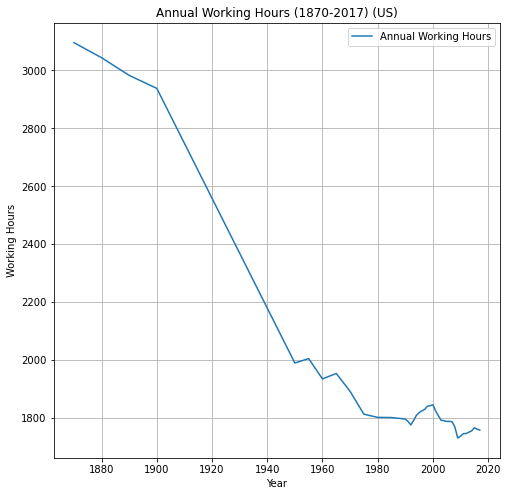

<Figure size 432x288 with 0 Axes>

In [4]:
wh_time_plot = all_data_new.plot(kind="line", x="Year", xlabel="Year", y="Annual Working Hours", ylabel="Working Hours", grid=True, figsize=(8,8), 
               title="Annual Working Hours (1870-2017) (US)")
wh_time_plot.xaxis.get_label().set_visible(True)
wh_time_plot.yaxis.get_label().set_visible(True)
plt.show()
plt.savefig('wh_time_line_plot.png')

The regression line equation is: y = -133.39x +3474.69
The correlation coefficient (r) is: -0.9269304430483828
The r-squared is: 0.8592000462498712


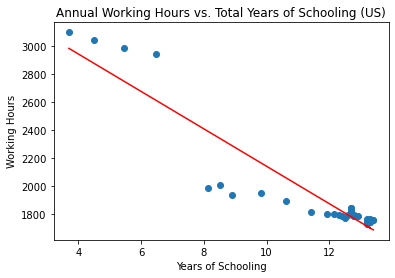

In [5]:
x=all_data_new["Total Years of Schooling"]
y=all_data_new["Annual Working Hours"]
(edu_wh_slope, edu_wh_intercept, edu_wh_rvalue, edu_wh_pvalue, edu_wh_stderr) = linregress(x,y)
regress_values = x * edu_wh_slope + edu_wh_intercept
line_eq = "y = " + str(round(edu_wh_slope,2)) + "x +" + str(round(edu_wh_intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title("Annual Working Hours vs. Total Years of Schooling (US)")
plt.xlabel("Years of Schooling")
plt.ylabel("Working Hours")
print(f"The regression line equation is: {line_eq}")
print(f"The correlation coefficient (r) is: {edu_wh_rvalue}")
print(f"The r-squared is: {edu_wh_rvalue**2}")
plt.savefig('wh_edu_scatter.png')
plt.show()

In [6]:
#Import new dataset analyzing hours worked by educational attainment
edu_level.head()

,Educational Attainment,Total Employed,Number (Average Day),Percent of Employed (Average Day),Average hours of work (Average Day),Number (Average Weekday),Percent of Employed (Average Weekday),Average hours of work (Average Weekday),"Number (Average Sat, Sun, Holiday)","Percent of Employed (Average Sat, Sun, Holiday)","Average hours of work (Average Sat, Sun, Holiday)"
0,Less than a high school diploma,"10,339","6,832",66.1,8.07,"8,503",82.2,8.12,"2,950",28.5,7.74
1,"High school graduates, no college","36,458","24,095",66.1,8.11,"29,360",80.5,8.43,"11,370",31.2,6.12
2,Some college or associate degree,"34,223","22,597",66.0,7.82,"27,625",80.7,8.14,"10,555",30.8,5.79
3,Bachelor's degree and higher,"63,210","45,069",71.3,7.36,"55,153",87.3,7.91,"21,501",34.0,4.04
4,Bachelor's degree only,"36,985","25,713",69.5,7.57,"31,432",85.0,8.04,"12,165",32.9,4.68


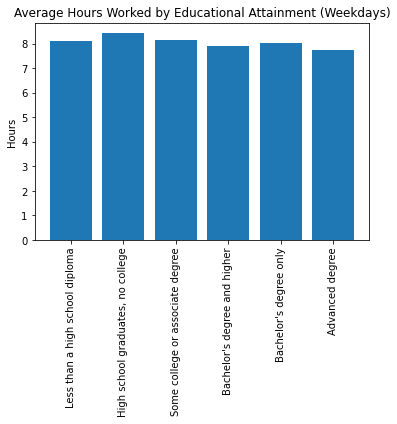

In [8]:
#Average hours spent working (weekdays) by educational attainment
y=edu_level["Average hours of work (Average Weekday)"]
x=edu_level["Educational Attainment"]
plt.title('Average Hours Worked by Educational Attainment (Weekdays)')
plt.bar(x,y)
plt.xticks(rotation=90)
plt.ylabel("Hours")
plt.savefig('wh_wkdy_bar.png')

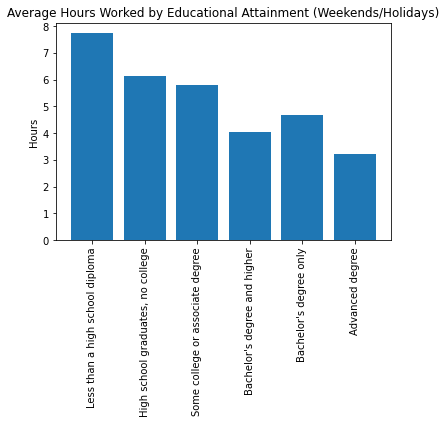

In [16]:
#Average hours spent working (weekends/holidays) by educational attainment
y=edu_level["Average hours of work (Average Sat, Sun, Holiday)"]
x=edu_level["Educational Attainment"]
plt.title('Average Hours Worked by Educational Attainment (Weekends/Holidays)')
plt.bar(x,y)
plt.xticks(rotation=90)
plt.ylabel("Hours")
plt.savefig('wh_wknd_bar.png')

In [11]:
#Input observed values
observed = pd.Series([7.74,6.12,5.79,4.04,4.68,3.23], index=["Less than a high school diploma", "High school graduates, no college", "Some college or associate degree","Bachelor's degree and higher","Bachelor's degree only","Advanced Degree"])

In [12]:
wknd_hours_df = pd.DataFrame([observed]).T

In [13]:
## Input expected values
wknd_hours_df[1] = 5.27

In [14]:
# Rename columns
wknd_hours_df.columns = ["observed", "expected"]
wknd_hours_df

,observed,expected
Less than a high school diploma,7.74,5.27
"High school graduates, no college",6.12,5.27
Some college or associate degree,5.79,5.27
Bachelor's degree and higher,4.04,5.27
Bachelor's degree only,4.68,5.27
Advanced Degree,3.23,5.27


In [15]:
# The degree of freedom is 6-1 = 5
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 5)
critical_value

11.070497693516351

In [16]:
# Run the chi square test with stats.chisquare()
stats.chisquare(wknd_hours_df["observed"], wknd_hours_df["expected"])

Power_divergenceResult(statistic=2.48888045540797, pvalue=0.7781687577075137)